# Cho tập dữ liệu Wine Quality

In [4]:
### BÀI TẬP TRÊN LỚP
# 1.Đọc dữ liệu , sau đó hiển thị 5 dòng đầu tiên , thông tin về dữ liệu , thống kê mô tả
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('/Users/macbook/Desktop/Hoc tap/Số hoá/LAB5/winequality-red.csv')

# Hiển thị 5 dòng đầu tiên
print(df.head())

# Thông tin về dữ liệu
print(df.info())

# Thống kê mô tả
print(df.describe())

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

Số lượng giá trị thiếu trong mỗi cột:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Figure size 2000x2500 with 0 Axes>

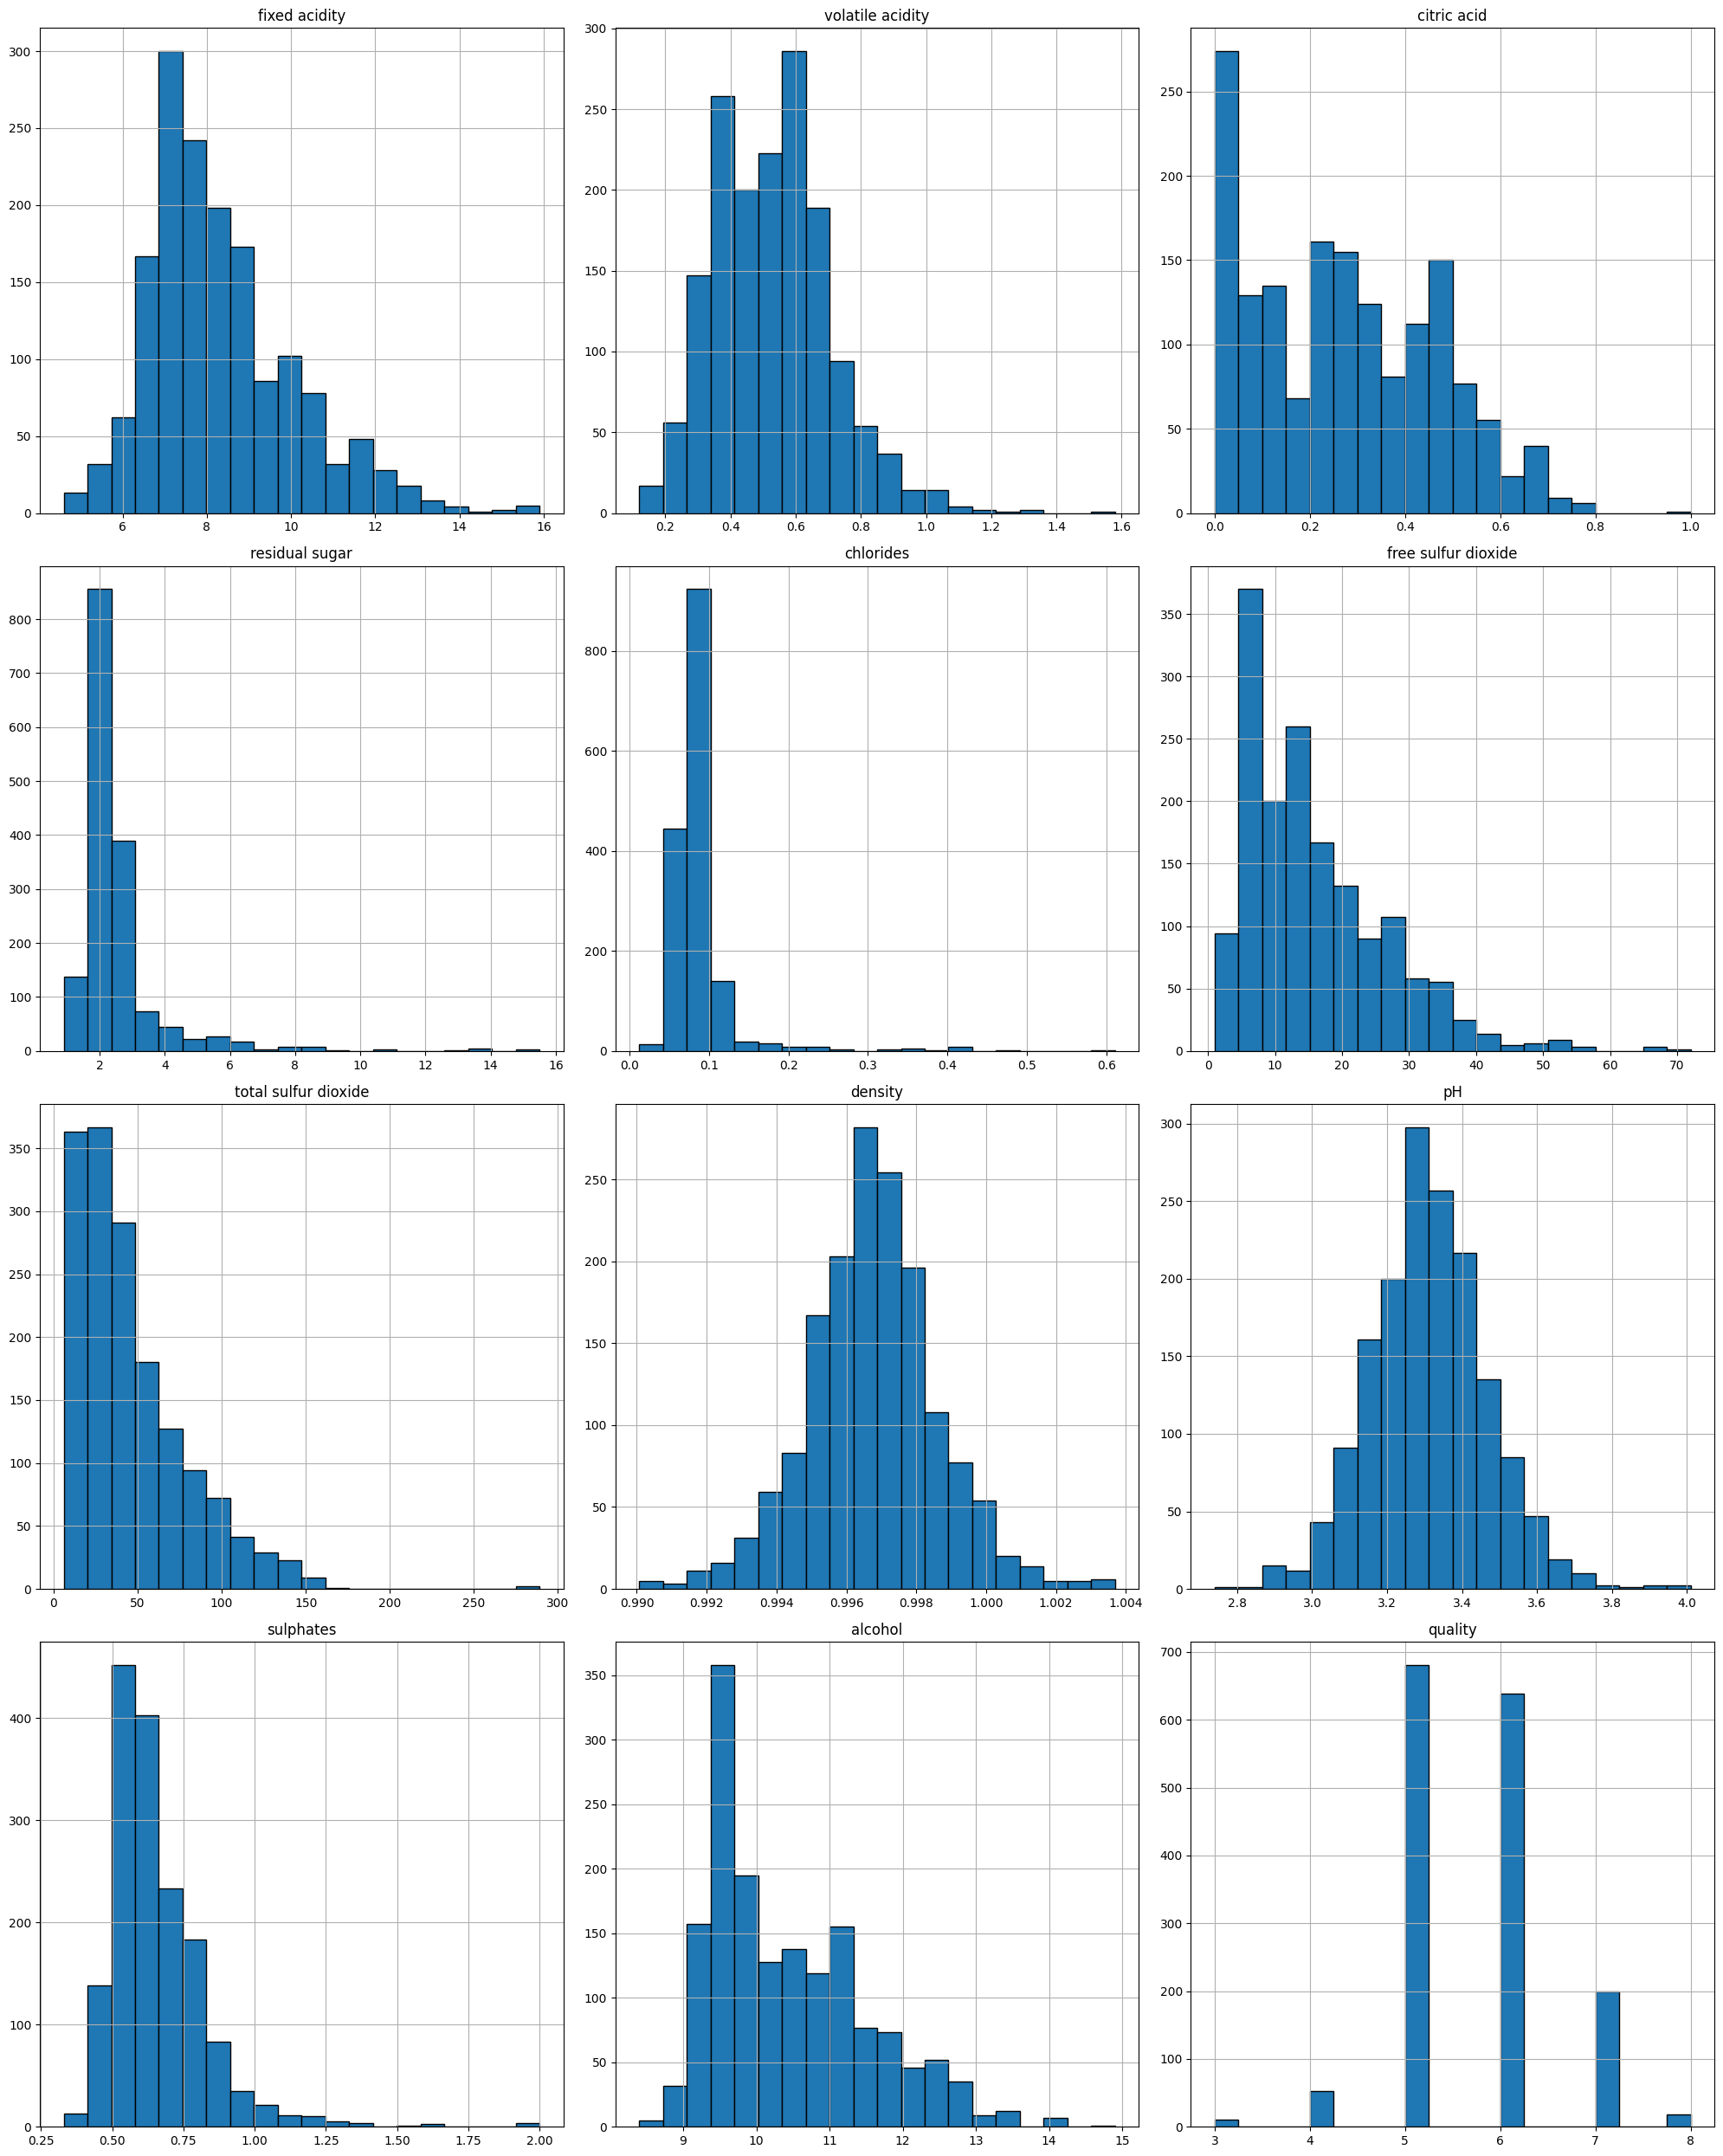

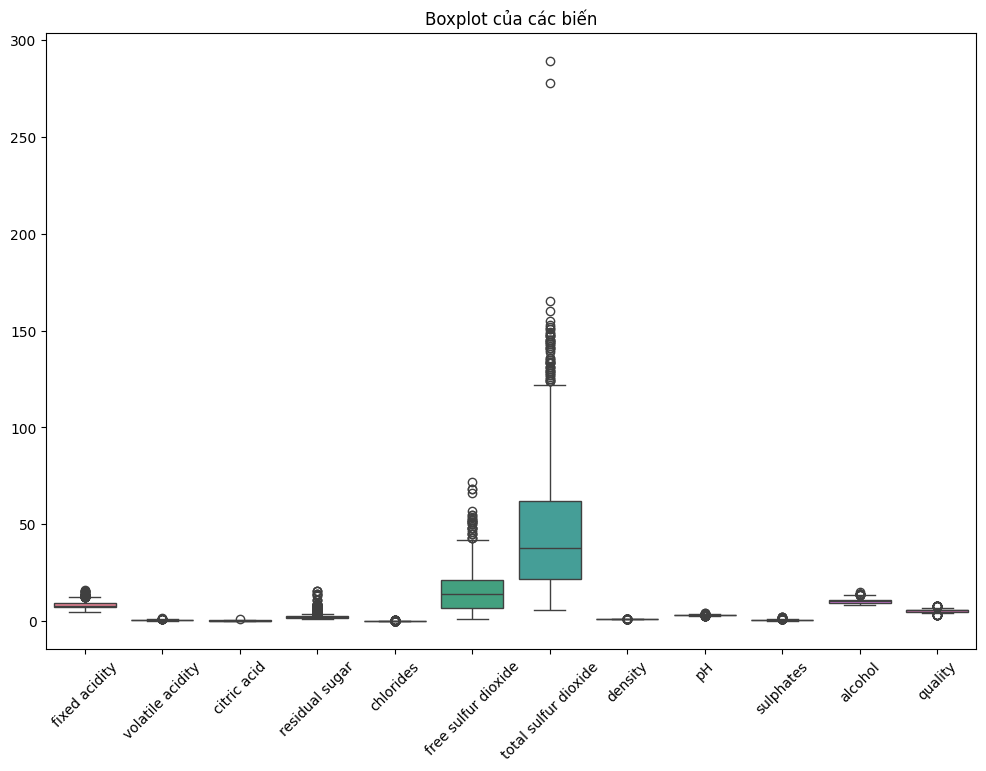

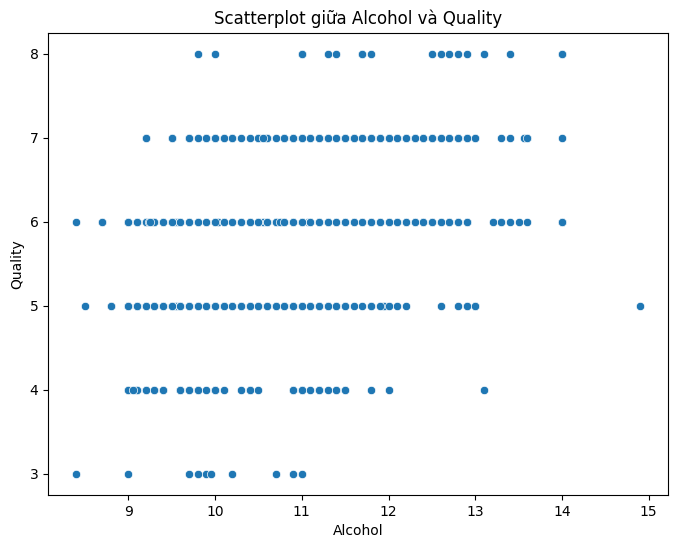

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/macbook/Desktop/Hoc tap/Số hoá/LAB5/winequality-red.csv"
df = pd.read_csv(file_path, sep=";")

# 2.1 Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 2.2 Vẽ histogram cho tất cả các biến 
plt.figure(figsize=(20, 25))
df.hist(bins=20, figsize=(20, 25), edgecolor="black")
plt.tight_layout()
plt.show()
# Nhận xét:

# 2.3 Vẽ boxplot cho tất cả các biến 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot của các biến")
plt.show()
# Nhận xét:

# 2.4 Vẽ Scatterplot cho "alcohol" 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["alcohol"], y=df["quality"])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Scatterplot giữa Alcohol và Quality")
plt.show()
# Nhận xét:


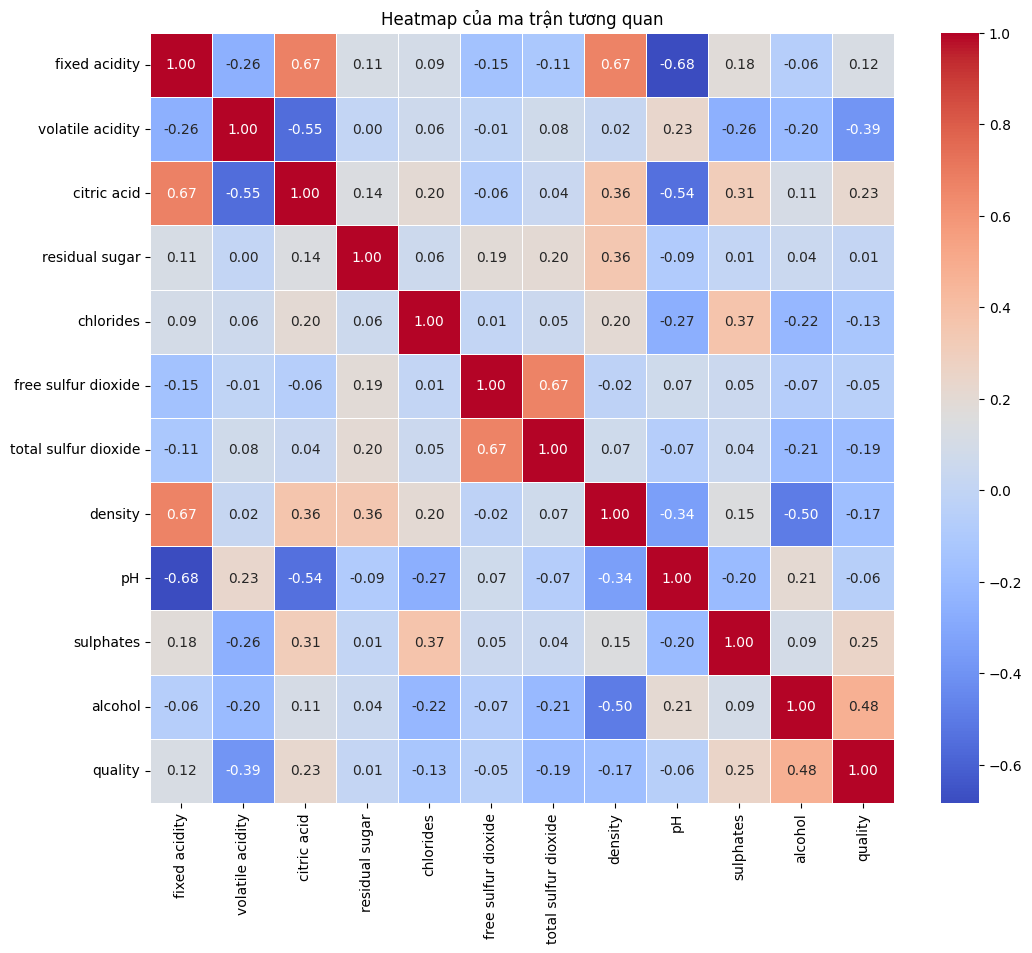

In [6]:
# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap của ma trận tương quan")
plt.show()

In [8]:

import numpy as np

# 4.1 Xáo trộn dữ liệu
np.random.seed(42)
shuffled_indices = np.random.permutation(len(df))
df_shuffled = df.iloc[shuffled_indices].reset_index(drop=True)

# 4.2 Chia dữ liệu với 80% huấn luyện
test_size = int(0.2 * len(df_shuffled))
train_size = len(df_shuffled) - test_size

df_train = df_shuffled[:train_size]
df_test = df_shuffled[train_size:]

# 4.3 Tách dữ liệu
print(f"Số mẫu trong tập huấn luyện: {len(df_train)}")
print(f"Số mẫu trong tập kiểm tra: {len(df_test)}")

# 4.4 Tách đặc trưng và nhãn
X_train = df_train.drop(columns=["quality"])
y_train = df_train["quality"]
X_test = df_test.drop(columns=["quality"])
y_test = df_test["quality"]

print("Dữ liệu huấn luyện và kiểm tra đã được chia thành công.")


Số mẫu trong tập huấn luyện: 1280
Số mẫu trong tập kiểm tra: 319
Dữ liệu huấn luyện và kiểm tra đã được chia thành công.


In [10]:
# 5. Chuẩn bị dữ liệu
from sklearn.preprocessing import StandardScaler

# 5.1 Khởi tạo bộ dữ liệu chuẩn hoá
scaler = StandardScaler()

# 5.2 Chuẩn hoá tập huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# 5.3 Chuẩn hoá tập kiểm tra
X_test_scaled = scaler.transform(X_test)

print("Dữ liệu đã được chuẩn hoá thành công.")


Dữ liệu đã được chuẩn hoá thành công.


In [11]:
# 6. Ứng dụng mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
# 6.1 Khởi tạo
model = LinearRegression()

# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)
print("Mô hình hồi quy tuyến tính đã được huấn luyện và dự đoán thành công.")

Mô hình hồi quy tuyến tính đã được huấn luyện và dự đoán thành công.


In [12]:
#7. Đánh giá mô hình
# Tính MSE và R^2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.3478536364356749
R-squared (R²): 0.4266612585466357


In [ ]:
# BTVN: 
# 1.hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác
# 2. CHo bộ dữ liệu sau: How long we live
file_path = "/Users/macbook/Desktop/Hoc tap/Số hoá/LAB5/howlongwelive.csv"
df = pd.read_csv(file_path)

# 2.1 Có bao nhiêu cột và bao nhiêu hàng
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

# 2.2 Danh sách tên của các cột
print("Danh sách các cột:", df.columns.tolist())

# 2.3 Thử dùng df["status"]
print("Cột 'Status':\n", df["Status"].head())

# 2.4 Cho biết có bao nhiêu nước đang phát triển và  bao nhiêu nước ohát triển
status_counts = df["Status"].value_counts()
print("Số lượng quốc gia theo trạng thái phát triển:")
print(status_counts)

# 2.5 Tính min, max, mean, median của alcohol  
alcohol_stats = {
    "min": df["Alcohol"].min(),
    "max": df["Alcohol"].max(),
    "mean": df["Alcohol"].mean(),
    "median": df["Alcohol"].median()
}
print("Thống kê về Alcohol:", alcohol_stats)
 
# 2.6 
# 2.6.1 đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
alcohol_mean = alcohol_stats["mean"]
high_alcohol_countries = df[df["Alcohol"] > alcohol_mean]["Country"].unique()
print(f"Số quốc gia có tiêu thụ rượu cao hơn mức trung bình: {len(high_alcohol_countries)}")
print("Một số quốc gia tiêu biểu:", high_alcohol_countries[:10])

# 2.6.2 Lấy danh sách các quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
schooling_mean = df["Schooling"].mean()
gdp_mean = df["GDP"].mean()
high_edu_high_gdp_countries = df[(df["Schooling"] > schooling_mean) & (df["GDP"] > gdp_mean)]["Country"].unique()
print("Danh sách quốc gia có trình độ học vấn và GDP cao hơn mức trung bình:")
print(high_edu_high_gdp_countries[:10])

Số hàng: 2938, Số cột: 22
Danh sách các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Cột 'Status':
 0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object
Số lượng quốc gia theo trạng thái phát triển:
Status
Developing    2426
Developed      512
Name: count, dtype: int64
Thống kê về Alcohol: {'min': 0.01, 'max': 17.87, 'mean': 4.602860787172012, 'median': 3.755}
Số quốc gia có tiêu thụ rượu cao hơn mức trung bình: 92
Một số quốc gia tiêu biểu: ['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium']
Danh sách quốc gia có trình độ học vấn và GDP cao hơn mức trung 